In [6]:
!pip install textblob

from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [7]:
# Load the dataset
file_path = '/content/helpdesk_customer_multi_lang_tickets.csv'
df = pd.read_csv(file_path)

In [8]:
# Define a function for sentiment analysis
def analyze_sentiment(text):
    if pd.isnull(text):
        return None, None  # Handle missing values
    blob = TextBlob(str(text))
    return blob.polarity, blob.subjectivity

In [9]:
# Perform sentiment analysis on the 'body' column (or 'subject' if you prefer)
if 'body' in df.columns:
    print("Performing sentiment analysis on the 'body' column...")
    df[['Polarity', 'Subjectivity']] = df['body'].apply(lambda x: pd.Series(analyze_sentiment(x)))

Performing sentiment analysis on the 'body' column...


In [10]:
# Display a few examples of sentiment analysis results
print("\nSentiment Analysis Results (First 5 Rows):")
print(df[['body', 'Polarity', 'Subjectivity']].head())


Sentiment Analysis Results (First 5 Rows):
                                                body  Polarity  Subjectivity
0  Dear Customer Support Team, We are experiencin...  0.147333      0.444333
1  Dear Customer Support,<br><br>I hope this mess...  0.220000      0.605000
2  Hallo, wir haben severe Datenverluste in MySQL...  0.000000      0.000000
3  Sehr geehrtes Kundenserviceteam,\n\nich hoffe,...  0.000000      0.000000
4  Caro Suporte ao Cliente,\n\nEstou enfrentando ...  0.000000      1.000000


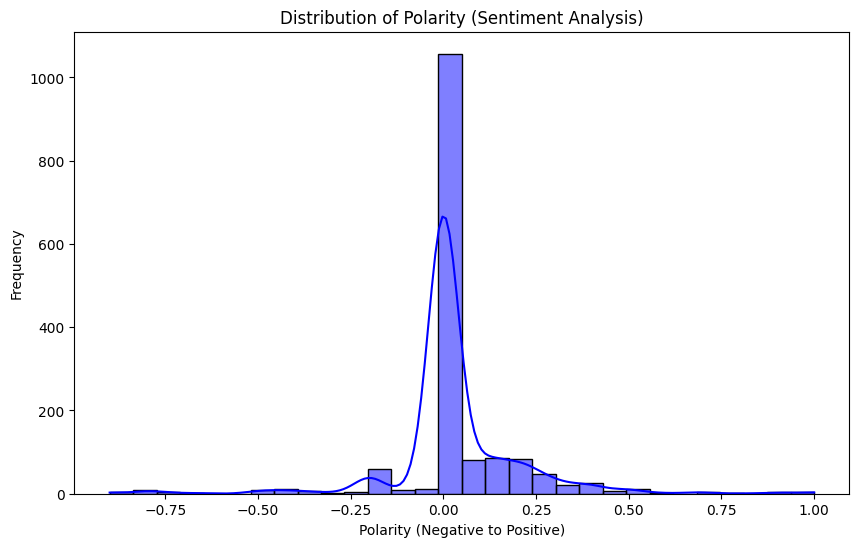

In [11]:
# Visualize the polarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Polarity'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribution of Polarity (Sentiment Analysis)')
plt.xlabel('Polarity (Negative to Positive)')
plt.ylabel('Frequency')
plt.show()

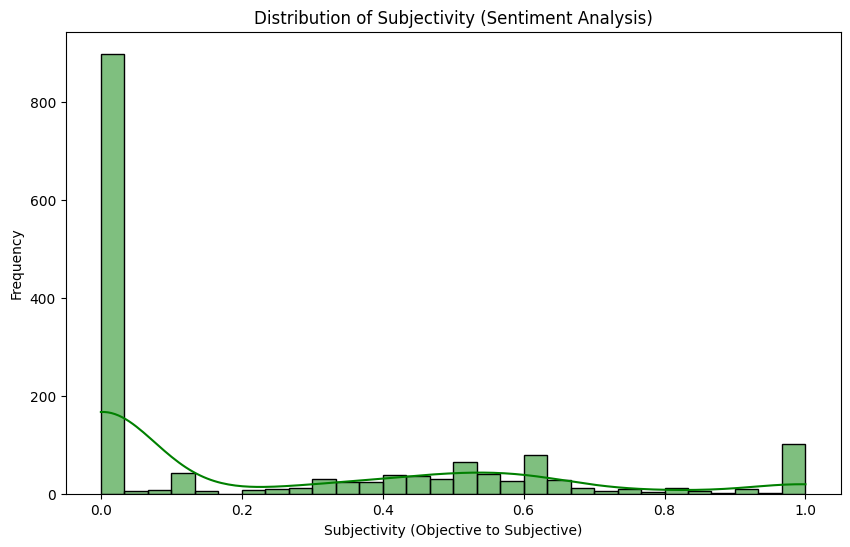

In [12]:
# Visualize the subjectivity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Subjectivity'].dropna(), kde=True, bins=30, color='green')
plt.title('Distribution of Subjectivity (Sentiment Analysis)')
plt.xlabel('Subjectivity (Objective to Subjective)')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Save results with sentiment scores
output_path = '/content/helpdesk_with_sentiment.csv'
df.to_csv(output_path, index=False)
print(f"Dataset with sentiment analysis saved to {output_path}")

Dataset with sentiment analysis saved to /content/helpdesk_with_sentiment.csv
